# Análise de Perfil de Cliente
### Entendimento do Negócio

O departamento de marketing de um banco realizou uma campanha nacional de 3 meses focada na venda de um produto de investimento, direcionada a clientes selecionados. Após o término da campanha, a equipe de Analytics recebeu a base de dados para análise do perfil desses clientes. O principal objetivo é identificar os grupos mais propensos a adquirir títulos e investimentos (com base na coluna 'Cliente_Comprou_o_Titulo?'), visando otimizar futuras campanhas.

Sua missão, como Analista de Dados, é conduzir uma análise exploratória considerando variáveis como idade, profissão, estado civil, nível de educação, crédito, hipoteca e empréstimo. O resultado deve ser um relatório com insights claros e direcionados para a tomada de decisões estratégicas no negócio.

### Problema a ser resolvido:
- Quais são os fatores mais relevantes que influenciam a compra de títulos.
- Há algum padrão específico entre as variáveis númericas (Saldo_Conta_Corrente, Qte_de_Ligações_Feitas, Idade...)
- Existem padrões específicos em relação as variáveis categóricas (Estado_Civil, Profissão, Formação)
- Qual o perfil do cliente que compra e que não compra os títulos. (Personas)
- Qual indicação você daria ao banco.


## Dicionário de Colunas

### Colunas numéricas (int64):

- Saldo_Conta_Corrente: Saldo atual do cliente na conta corrente.

- Qte_de_Ligações_Feitas: Número de ligações feitas para o cliente durante a campanha.

- Idade: Idade do cliente.

### Colunas categóricas (object):
- Cliente_Comprou_o_Titulo?: Indica se o cliente comprou o produto de investimento (Sim/Não).

- Profissão: Profissão do cliente (e.g., Operário, Administrador, Aposentado).

- Estado_Civil: Estado civil do cliente (e.g., Solteiro, Casado).

- Formação: Nível de escolaridade do cliente (e.g., Ensino Médio, Ensino Superior).

- Cliente_Devedor?: Indica se o cliente tem uma dívida registrada (Sim/Não).

- Tem_Hipoteca?: Indica se o cliente possui uma hipoteca (Sim/Não).

- Tem_Emprestimo?: Indica se o cliente possui um empréstimo (Sim/Não)..


# Importando a Base e as Bibliotecas

In [1691]:
# Importando as Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [1692]:
base = pd.read_csv('bank_marketing.csv', header=1)

### Entendimento dos Dados
Nesta primeira etapa do CRISP-DM, é importante entender os dados disponíveis para o projeto. Isso envolve conhecer as informações, verificar se estão corretas e identificar padrões iniciais. Esse processo ajuda a preparar os dados para as próximas fases da análise.

In [1693]:
# Verificando o tamanho da base de dados
base.shape

(9684, 11)

Temos 9684 linhas (clientes) e 10 colunas

In [1694]:
# Verificando a base de dados
base.head()

,Unnamed: 0,Cliente_Comprou_o_Titulo?,Idade,Profissão,Estado_Civil,Formação,Cliente_Devedor?,Saldo_Conta_Corrente,Tem_Hipoteca?,Tem_Emprestimo?,Qte_de_Ligações_Feitas
0,NaN,Não,33,Operário,Casado,Ensino Médio,Não,263,Sim,Não,3
1,NaN,Não,58,Aposentado,Casado,Ensino Médio,Não,19,Não,Sim,3
2,NaN,Sim,83,Aposentado,Casado,Fundamental,Não,425,Não,Não,1
3,NaN,Sim,32,Administrador,Solteiro,Ensino Superior,Não,10281,Não,Não,1
4,NaN,Sim,31,Administrador,Solteiro,Ensino Médio,Não,360,Sim,Não,1


**OBS**: Percebemos a existência de uma coluna com dados faltantes que necessita de um tratamento. Vamos conferir se esse padrão se extende para todas as linhas na etapa de 'Tratamento'.

Agora vamos verificar alguns dados estatísticos das colunas numéricas.

In [1695]:
# Verificando informações da base final
base.describe()

,Unnamed: 0,Idade,Saldo_Conta_Corrente,Qte_de_Ligações_Feitas
count,0.0,9684.000000,9684.000000,9684.000000
mean,NaN,41.235130,1706.046881,2.463445
std,NaN,12.110432,2749.931890,2.630583
min,NaN,18.000000,1.000000,1.000000
25%,NaN,32.000000,258.000000,1.000000
50%,NaN,38.000000,728.000000,2.000000
75%,NaN,49.000000,2007.000000,3.000000
max,NaN,95.000000,29340.000000,63.000000


### Preparação dos Dados (Tratamento)
Na etapa de Preparação dos Dados do CRISP-DM, os dados são organizados e tratados para garantir que estejam prontos para análise. Isso inclui limpar dados incorretos ou faltantes, transformar informações em formatos adequados, e selecionar as variáveis mais importantes para o projeto.

In [1696]:
# Verificando dados nulos
base.isnull().sum()

Unnamed: 0                   9684
Cliente_Comprou_o_Titulo?       0
Idade                           0
Profissão                       0
Estado_Civil                    0
Formação                        0
Cliente_Devedor?                0
Saldo_Conta_Corrente            0
Tem_Hipoteca?                   0
Tem_Emprestimo?                 0
Qte_de_Ligações_Feitas          0
dtype: int64

**OBS**: Verificamos que todas as linhas dessa coluna possuem valores faltantes. Então, vamos optar por excluir essa coluna.

In [1697]:
# Excluindo a primeira coluna (índice 0)
base = base.drop(base.columns[0], axis=1)

In [1698]:
# Verificando informações da base final e conferindo a exclusão da coluna 'Unnamed'
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9684 entries, 0 to 9683
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Cliente_Comprou_o_Titulo?  9684 non-null   object
 1   Idade                      9684 non-null   int64 
 2   Profissão                  9684 non-null   object
 3   Estado_Civil               9684 non-null   object
 4   Formação                   9684 non-null   object
 5   Cliente_Devedor?           9684 non-null   object
 6   Saldo_Conta_Corrente       9684 non-null   int64 
 7   Tem_Hipoteca?              9684 non-null   object
 8   Tem_Emprestimo?            9684 non-null   object
 9   Qte_de_Ligações_Feitas     9684 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 756.7+ KB


É visível que existem colunas que não são numéricas e para uma análise mais facil e clara, é necessário converter as variaveis categóricas em numéricas. Existem algumas colunas como, profissão, estado civil e formação não serão covertidas, elas serão análisadas mais para frente. E as que são possíveis serão mudadas para 0, representando não e 1, representando sim.

In [1699]:
# Converter colunas categóricas de Sim/Não para 0/1
base['Cliente_Comprou_o_Titulo?'] = base['Cliente_Comprou_o_Titulo?'].map({'Sim': 1, 'Não': 0})
base['Cliente_Devedor?'] = base['Cliente_Devedor?'].map({'Sim': 1, 'Não': 0})
base['Tem_Hipoteca?'] = base['Tem_Hipoteca?'].map({'Sim': 1, 'Não': 0})
base['Tem_Emprestimo?'] = base['Tem_Emprestimo?'].map({'Sim': 1, 'Não': 0})

Agora vamos checar se essas colunas foram devidamente covertidas.

In [1700]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9684 entries, 0 to 9683
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Cliente_Comprou_o_Titulo?  9684 non-null   int64 
 1   Idade                      9684 non-null   int64 
 2   Profissão                  9684 non-null   object
 3   Estado_Civil               9684 non-null   object
 4   Formação                   9684 non-null   object
 5   Cliente_Devedor?           9684 non-null   int64 
 6   Saldo_Conta_Corrente       9684 non-null   int64 
 7   Tem_Hipoteca?              9684 non-null   int64 
 8   Tem_Emprestimo?            9684 non-null   int64 
 9   Qte_de_Ligações_Feitas     9684 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 756.7+ KB


Nota-se que as colunas foram devidamente convertidas e agora podemos começar com uma análise mais fácil e certeira.

para isso será feita a correlação entre as colunas numéricas, para tentar perceber mais claramente quais colunas se correlacionam.

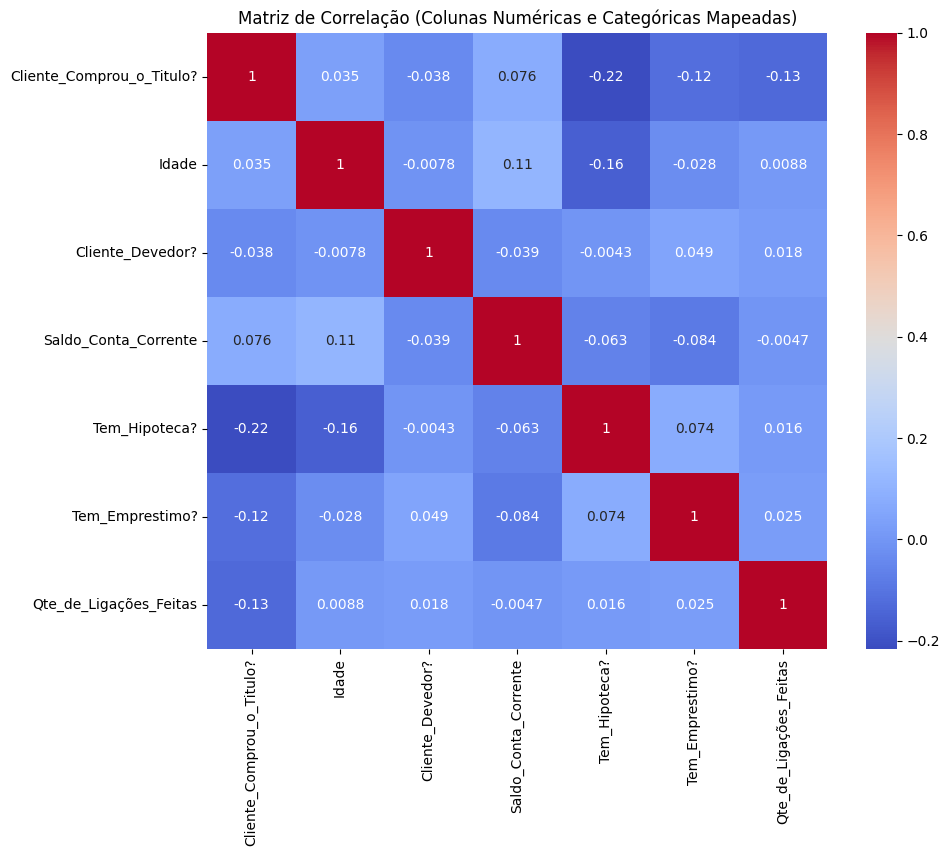

In [1701]:
# Selecionar todas as colunas numéricas (incluindo as que foram mapeadas)
colunas_numericas = base.select_dtypes(include=['int64', 'float64']).columns

# Gerar a matriz de correlação para as colunas numéricas
correlation_matrix = base[colunas_numericas].corr()

# Plotar o heatmap para visualização
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação (Colunas Numéricas e Categóricas Mapeadas)')
plt.show()

### Insights Sobre a Correlação das Variáveis Numéricas.
O foco deste mapa de correlação é com a coluna 'Cliente_Comprou_o_Titulo?', pois ela indica se o cliente comprou o titulo do banco ou não, sendo uma variável crucial para entender os padrões do cliente. Ao analisar as correlações com essa coluna, podemos identificar quais variáveis possuem maior influência sobre o padrão de compra dos clientes.

Quanto mais próximo de 0, mais fraca é a correlação entre as variáveis, indicando pouca ou nenhuma relação linear entre elas. Por outro lado, quanto mais distante de 0 (em direção a -1 ou 1), mais forte é a correlação, com -1 indicando uma correlação negativa perfeita e 1 indicando uma correlação positiva perfeita. Os valores variam de -1 a 1.

Nota-se que, embora não existam correlações fortes entre as variáveis numéricas, é essencial realizar uma investigação mais aprofundada dessas variáveis, pois elas ainda podem revelar insights valiosos para o Banco.

### 1 - Fatores Relevantes
Vamos analisar as principais correlações identificadas na base de dados para extrair insights relevantes sobre o comportamento dos clientes. Para isso, a base será segmentada em duas categorias: clientes que realizaram a compra do título e clientes que não realizaram. Essa divisão permitirá a criação de gráficos comparativos, facilitando a visualização e compreensão das variáveis mais impactantes que podem ter influenciado a decisão de compra. Esses gráficos serão essenciais para identificar padrões e tendências que ajudaram a determinar o perfil dos clientes que optaram por investir nos produtos da instituição.

In [1702]:
cliente_comprou = base[base['Cliente_Comprou_o_Titulo?'] == 1]
cliente_nao_comprou = base[base['Cliente_Comprou_o_Titulo?'] == 0]

In [1703]:
# Verificação da base 'cliente_comprou'.
cliente_comprou.head()

,Cliente_Comprou_o_Titulo?,Idade,Profissão,Estado_Civil,Formação,Cliente_Devedor?,Saldo_Conta_Corrente,Tem_Hipoteca?,Tem_Emprestimo?,Qte_de_Ligações_Feitas
2,1,83,Aposentado,Casado,Fundamental,0,425,0,0,1
3,1,32,Administrador,Solteiro,Ensino Superior,0,10281,0,0,1
4,1,31,Administrador,Solteiro,Ensino Médio,0,360,1,0,1
5,1,66,Aposentado,Casado,Fundamental,0,2883,0,0,1
6,1,34,Técnico,Casado,Ensino Médio,0,294,1,0,3


In [1704]:
# Verificação da base 'cliente_nao_comprou'.
cliente_nao_comprou.head()

,Cliente_Comprou_o_Titulo?,Idade,Profissão,Estado_Civil,Formação,Cliente_Devedor?,Saldo_Conta_Corrente,Tem_Hipoteca?,Tem_Emprestimo?,Qte_de_Ligações_Feitas
0,0,33,Operário,Casado,Ensino Médio,0,263,1,0,3
1,0,58,Aposentado,Casado,Ensino Médio,0,19,0,1,3
7,0,35,Operário,Casado,Ensino Médio,0,74,0,0,2
8,0,55,Administrador,Casado,Ensino Superior,0,1161,1,0,6
11,0,56,Administrador,Casado,Ensino Superior,0,746,0,0,1


Bases foram devidamente divididas.

Agora serão gerados alguns gráficos para tentar achar alguma correlação e definir quais os pontos que serão trabalhados nessa análise.

C:\Users\victor\AppData\Local\Temp\ipykernel_1708\337849204.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=cliente_comprou['Idade'], label='Compraram', shade=True)
C:\Users\victor\AppData\Local\Temp\ipykernel_1708\337849204.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=cliente_nao_comprou['Idade'], label='Não Compraram', shade=True)
C:\Users\victor\AppData\Local\Temp\ipykernel_1708\337849204.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=cliente_comprou['Saldo_Conta_Corrente'], label='Compraram', shade=True)
C:\Users\victor\AppData\Local\Temp\ipykernel_1708\337849204.py:16: FutureWarning: 

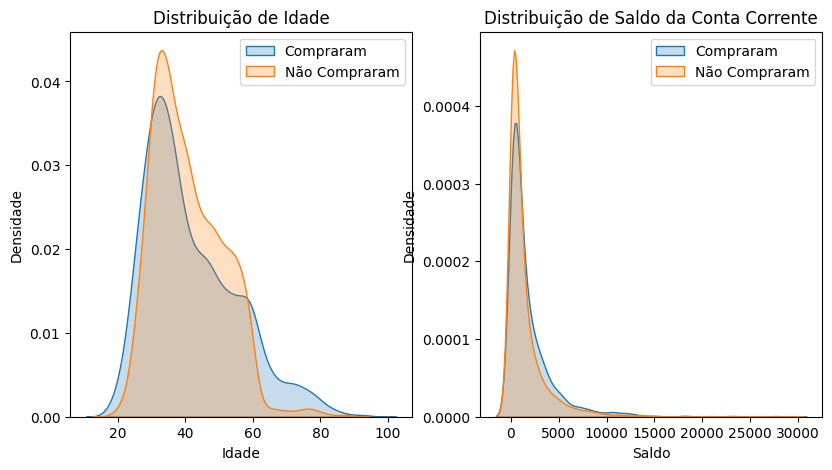

In [1705]:

# Comparar a densidade de variáveis numéricas entre os dois grupos
plt.figure(figsize=(15, 5))

# Densidade de Idade
plt.subplot(1, 3, 1)
sns.kdeplot(data=cliente_comprou['Idade'], label='Compraram', shade=True)
sns.kdeplot(data=cliente_nao_comprou['Idade'], label='Não Compraram', shade=True)
plt.title('Distribuição de Idade')
plt.xlabel('Idade')
plt.ylabel('Densidade')
plt.legend()

# Densidade de Saldo
plt.subplot(1, 3, 2)
sns.kdeplot(data=cliente_comprou['Saldo_Conta_Corrente'], label='Compraram', shade=True)
sns.kdeplot(data=cliente_nao_comprou['Saldo_Conta_Corrente'], label='Não Compraram', shade=True)
plt.title('Distribuição de Saldo da Conta Corrente')
plt.xlabel('Saldo')
plt.ylabel('Densidade')
plt.legend()



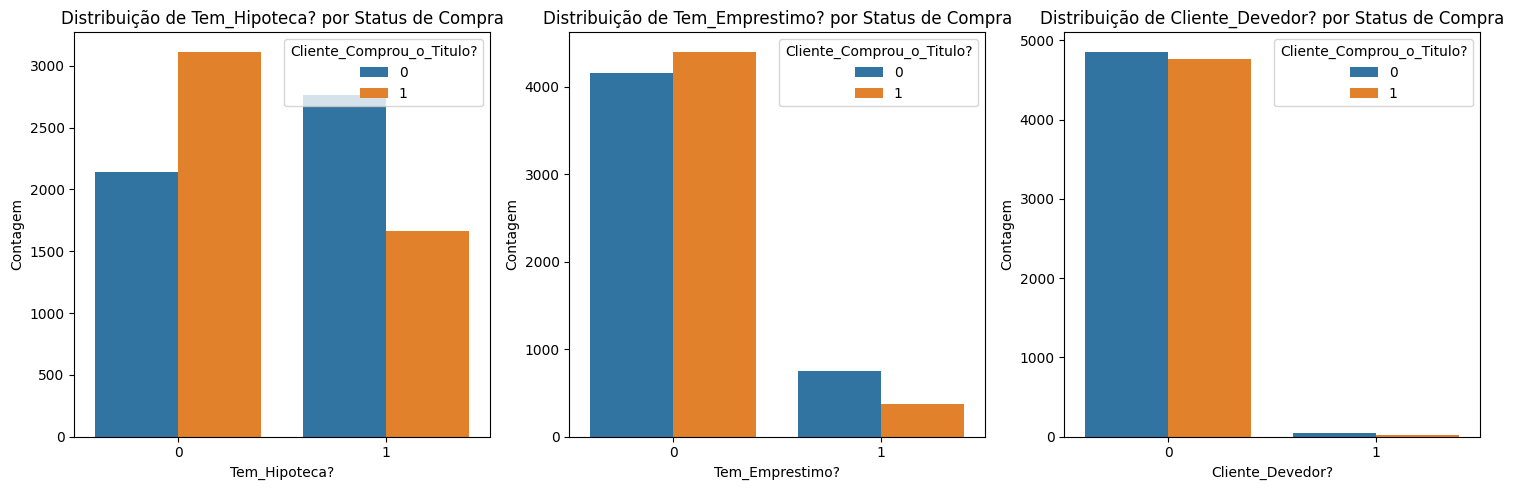

In [1706]:
# Definindo as variáveis categóricas para comparar
variaveis_numericas = ['Tem_Hipoteca?', 'Tem_Emprestimo?', 'Cliente_Devedor?'] 

# Criar um gráfico de barras para cada variável categórica
plt.figure(figsize=(15, 5))
for i, var in enumerate(variaveis_numericas):
    plt.subplot(1, 3, i+1)
    sns.countplot(x=var, hue='Cliente_Comprou_o_Titulo?', data=base)
    plt.title(f'Distribuição de {var} por Status de Compra')
    plt.xlabel(var)
    plt.ylabel('Contagem')

plt.tight_layout()
plt.show()


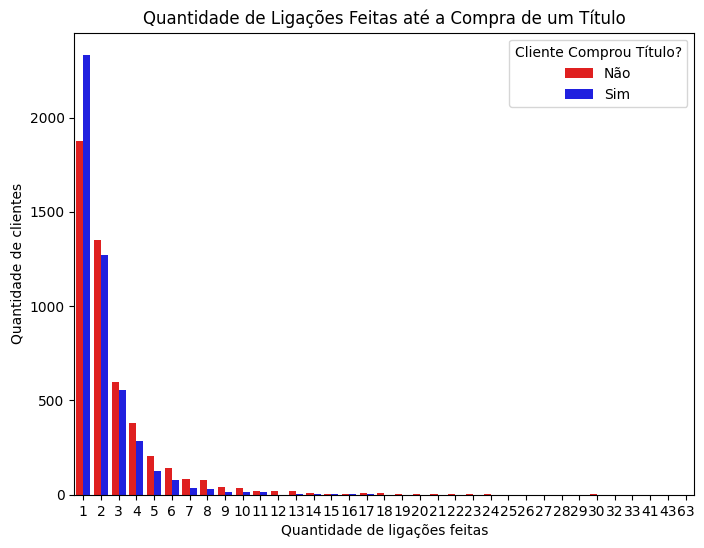

In [1707]:
# Para finalizar, a última coluna numérica.
plt.figure(figsize=(8, 6))
sns.countplot(x="Qte_de_Ligações_Feitas", hue="Cliente_Comprou_o_Titulo?", data=base, palette={1: "blue", 0: "red"})
plt.title('Quantidade de Ligações Feitas até a Compra de um Título')
plt.xlabel("Quantidade de ligações feitas")
plt.ylabel("Quantidade de clientes")
plt.legend(title='Cliente Comprou Título?', labels=['Não', 'Sim'])
plt.show()


### Pontos Principais para Analisar.



- **Relação entre Idade e Compra**: A distribuição de idade para clientes que compraram e não compraram parece seguir um padrão semelhante, mas há uma diferença visível na faixa etária. Clientes que não compraram tendem a se concentrar em uma faixa de idade mais jovem (em torno de 30-40 anos), enquanto a curva dos que compraram é mais ampla, abrangendo uma faixa de idade maior.
Ação: Manter a coluna "Idade" na análise, pois parece haver uma relação potencial entre a idade e a compra de títulos, que pode ser explorada em mais detalhes.

 

- **Relação entre Hipoteca e Compra"**: A maioria dos clientes que compraram títulos não possuem hipoteca (código "0"), mas há um número significativo de clientes com hipoteca que também compraram. Há uma certa distinção entre os grupos, com uma maior prevalência de compra entre aqueles que não têm hipoteca.


- **Relação entre Clientes que Devem e Compra**: A grande maioria dos clientes, tanto os que compraram quanto os que não compraram títulos, não são devedores (código "0"). Há pouquíssimos casos de clientes devedores, e a diferença entre compra e não compra é mínima.



- **Relação entre Quantidade de Ligações Feitas e Compra**: Observa-se que há um ponto em que, ao aumentar o número de ligações, a quantidade de conversões começa a diminuir de forma significativa. Esse comportamento pode indicar que, após um certo limite, as ligações adicionais não estão contribuindo para aumentar as vendas, podendo até gerar um efeito negativo.

- **Relação entre as Variáveis Categóricas e a Compra**: É importante investigar como variáveis categóricas como Profissão, Estado Civil e Formação influenciam o comportamento de compra dos clientes. Isso nos ajudará a identificar perfis específicos de clientes que têm maior probabilidade de realizar uma compra, fornecendo insights valiosos para estratégias de segmentação e marketing.

### Pontos que Não Vão Ser Explorados


- **Relação entre Saldo e Conta Corrente**: A distribuição do saldo não apresenta uma distinção clara entre os clientes que compraram e os que não compraram. Ambas as curvas seguem um padrão semelhante, com a maioria dos clientes tendo saldos baixos, e há pouca diferenciação entre os grupos.



- **Relação entre Clientes que tem Empréstimo e Compra**: A grande maioria dos clientes, tanto os que compraram quanto os que não compraram, não possuem empréstimo. No entanto, entre os que possuem empréstimo (código "1"), há uma ligeira redução no número de compras de títulos. Embora o gráfico mostre uma leve diferença, o impacto parece ser menor comparado a outras variáveis. Então por isso, essa variável não vai ser explorada.



### 2- Análise de Compras com Base na Idade dos Clientes

Nesta seção, vamos examinar as faixas etárias que apresentam maior incidência de compra de títulos de investimento e também a incidência de clientes que não compram, buscando insights valiosos a partir dessas informações. A análise das faixas etárias nos permitirá entender melhor quais grupos estão mais propensos a adquirir produtos financeiros e quais segmentos demonstram menor interesse, permitindo uma melhor segmentação das futuras campanhas.

Compreender essas dinâmicas é fundamental para o desenvolvimento de estratégias de marketing mais eficazes e direcionadas. Além disso, identificaremos oportunidades para personalizar ofertas e serviços, aumentando a satisfação do cliente e, consequentemente, impulsionando as vendas de produtos de investimento.

Mas antes disso, vamos analisar os clientes que o banco tem por faixa etária.


In [1708]:
# Analisando as faixas etárias com maior incidência de compra de títulos de investimento
# Agrupando as idades em faixas etárias.
faixa_etaria_detalhada = pd.cut(base['Idade'], 
                                 bins=[0, 18, 24, 34, 40, 45, 50, 55, 60, 65, 100], 
                                 right=True, 
                                 labels=['Abaixo de 18', '18-24', '25-34', '35-40', '41-45', '46-50', '51-55', '56-60', '61-65', '66+'])

# Contar as ocorrências em cada faixa etária detalhada
contagem_faixa_etaria_detalhada = faixa_etaria_detalhada.value_counts().sort_index()

contagem_faixa_etaria_detalhada

Idade
Abaixo de 18       8
18-24            253
25-34           3194
35-40           1953
41-45           1113
46-50            996
51-55            842
56-60            753
61-65            200
66+              372
Name: count, dtype: int64

**Insight**: É possível notar uma concentração significativa de clientes nas faixas etárias de 25-40 anos, que representam um total de 5147 clientes. Esse grupo é, sem dúvida, um público-alvo estratégico para o banco, indicando que ele está investindo esforços significativos para atrair e reter clientes nesse intervalo.

Isso sugere que estratégias de marketing e produtos financeiros podem ser especialmente moldados para atender a este segmento, como ofertas de títulos de investimento que se alinhem às necessidades e expectativas dessa faixa etária.

Após essa análise torna-se necessário analisar as faixas etárias dos clientes que compram os títulos do banco.

In [1709]:
# Analisando as faixas etárias com maior incidência de compra de títulos de investimento
# Agrupando as idades em faixas etárias.
faixa_etaria_detalhada = pd.cut(cliente_comprou['Idade'], 
                                 bins=[0, 18, 24, 34, 40, 45, 50, 55, 60, 65, 100], 
                                 right=True, 
                                 labels=['Abaixo de 18', '18-24', '25-34', '35-40', '41-45', '46-50', '51-55', '56-60', '61-65', '66+'])

# Contar as ocorrências em cada faixa etária detalhada
contagem_faixa_etaria_detalhada = faixa_etaria_detalhada.value_counts().sort_index()

contagem_faixa_etaria_detalhada



Idade
Abaixo de 18       7
18-24            189
25-34           1612
35-40            877
41-45            463
46-50            437
51-55            352
56-60            370
61-65            172
66+              299
Name: count, dtype: int64

**Insight**: Observa-se uma maior concentração de clientes que compram títulos de investimentos na faixa etária de 25-34 anos. Essa faixa etária demonstra um potencial elevado de interesse em produtos financeiros, o que pode ser atribuído a fatores como a busca por estabilidade financeira, planejamento para o futuro e a aquisição de ativos.

Para aprofundar essa análise, vamos gerar visualizações gráficas que ajudem a compreender melhor esses padrões.

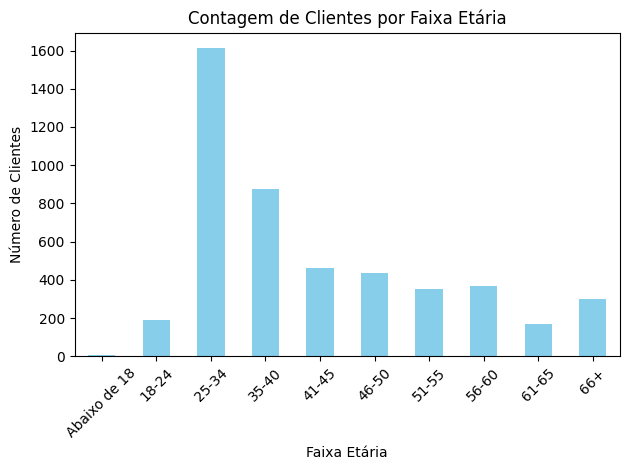

In [1710]:
# Criando gráfico de barras
contagem_faixa_etaria_detalhada.plot(kind='bar', color='skyblue')
# Adicionando título e rótulos
plt.title('Contagem de Clientes por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Clientes')

# Exibir gráfico
plt.xticks(rotation=45)
plt.tight_layout()  # Ajustar layout
plt.show()

**Insight**: A partir da faixa etária de 34 anos, observa-se uma queda gradual no número de clientes que compram títulos de investimento. Essa tendência pode indicar que o banco não está direcionando suas estratégias de marketing e produtos de forma eficaz para atrair clientes mais velhos. 

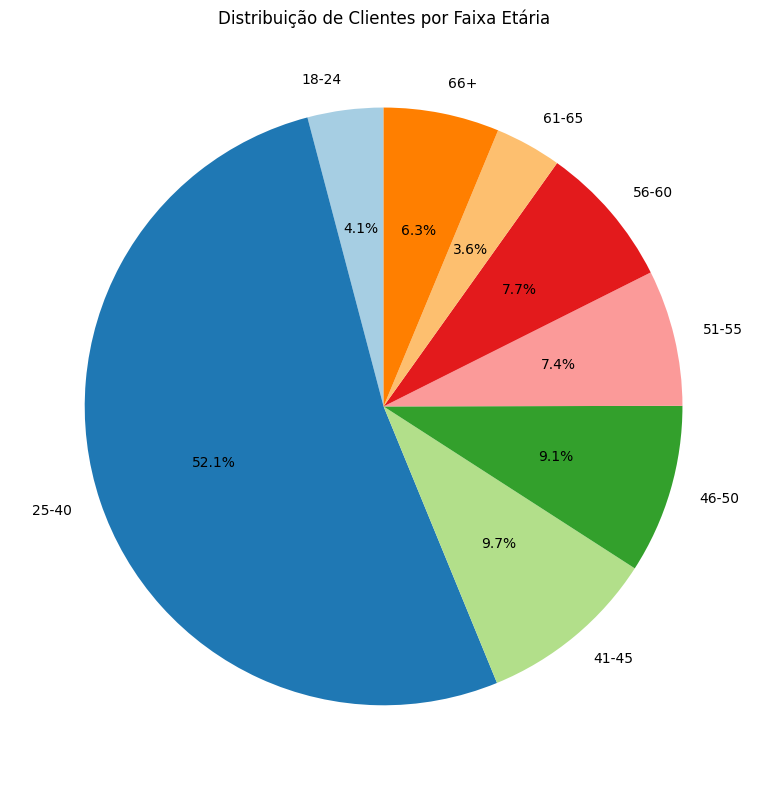

In [1711]:
# Plotando Gráfico de Pizza para Distribuição de Clientes por Faixa Etária.

# Dados das faixas etárias e suas contagens
faixas_etarias = ['18-24', '25-40','41-45', '46-50', '51-55', '56-60', '61-65', '66+']
contagem_faixas = [196, 2489, 463, 437, 352, 370, 172, 299]  # Contagem de clientes por faixa etária

# Criar gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(contagem_faixas, labels=faixas_etarias, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Adicionar título
plt.title('Distribuição de Clientes por Faixa Etária')

# Exibir gráfico
plt.tight_layout()
plt.show()

**Insight**: A soma das faixas etárias de 24 a 40 anos corresponde a 52,1% de todas as compras. Isso destaca essa faixa etária como um grupo-chave que representa uma parte significativa da base de clientes do banco. Essa predominância sugere que estratégias de marketing e produtos devem ser direcionadas para atender às necessidades e preferências desse segmento.

Agora que os clientes que compram os títulos foram analisados por faixa etária, é importante investigar também quais faixas etárias apresentam maior número de clientes que não compram. Esse estudo permitirá entender melhor os padrões de comportamento de compra entre os diferentes grupos etários, revelando quais segmentos não estão engajados com a aquisição de títulos.

In [1712]:
# Analisando as faixas etárias com maior incidência de compra de títulos de investimento
# Agrupando as idades em faixas etárias.
faixa_etaria_detalhada = pd.cut(cliente_nao_comprou['Idade'], 
                                 bins=[0, 18, 24, 34, 40, 45, 50, 55, 60, 65, 100], 
                                 right=True, 
                                 labels=['Abaixo de 18', '18-24', '25-34', '35-40', '41-45', '46-50', '51-55', '56-60', '61-65', '66+'])

# Contar as ocorrências em cada faixa etária detalhada
contagem_faixa_etaria_detalhada = faixa_etaria_detalhada.value_counts().sort_index()

contagem_faixa_etaria_detalhada

Idade
Abaixo de 18       1
18-24             64
25-34           1582
35-40           1076
41-45            650
46-50            559
51-55            490
56-60            383
61-65             28
66+               73
Name: count, dtype: int64

Predomínio da Faixa Etária Jovem: A faixa etária de 25-34 anos apresenta um número significativo de clientes que não compraram títulos (1582), indicando que essa é uma faixa com alto potencial de conversão.

Para aprofundar essa análise, vamos gerar visualizações gráficas que ajudem a compreender melhor esses padrões.

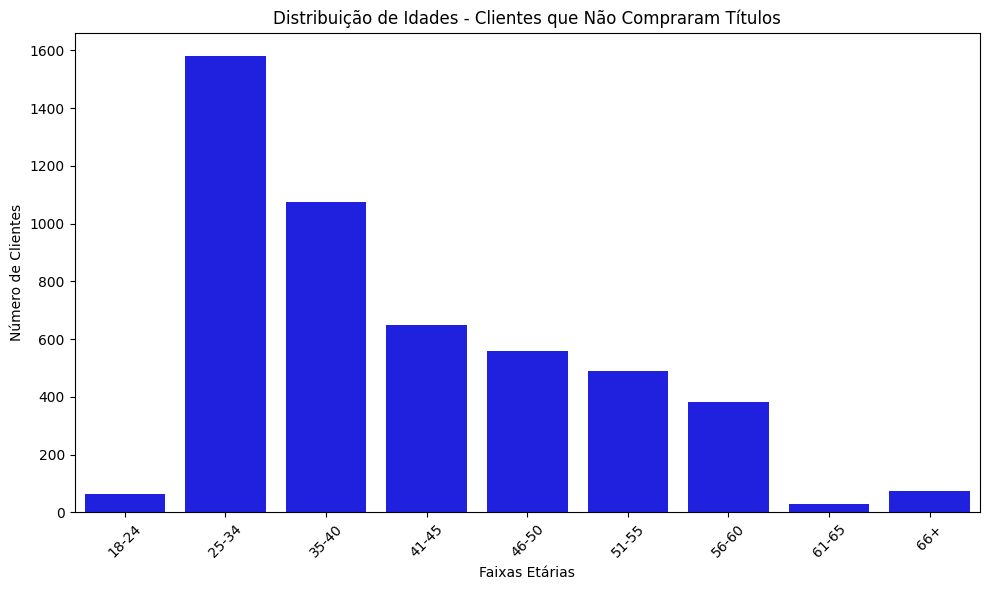

In [1713]:
# Dados das contagens de faixas etárias
faixas_etarias = ['18-24', '25-34', '35-40', '41-45', '46-50', '51-55', '56-60', '61-65', '66+']
contagem_faixa_etaria = [65, 1582, 1076, 650, 559, 490, 383, 28, 73]

# Criando o gráfico de colunas
plt.figure(figsize=(10, 6))
sns.barplot(x=faixas_etarias, y=contagem_faixa_etaria, color='b')


# Personalizar o gráfico
plt.title('Distribuição de Idades - Clientes que Não Compraram Títulos')
plt.xlabel('Faixas Etárias')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45)
plt.tight_layout()

# Exibir o gráfico
plt.show()


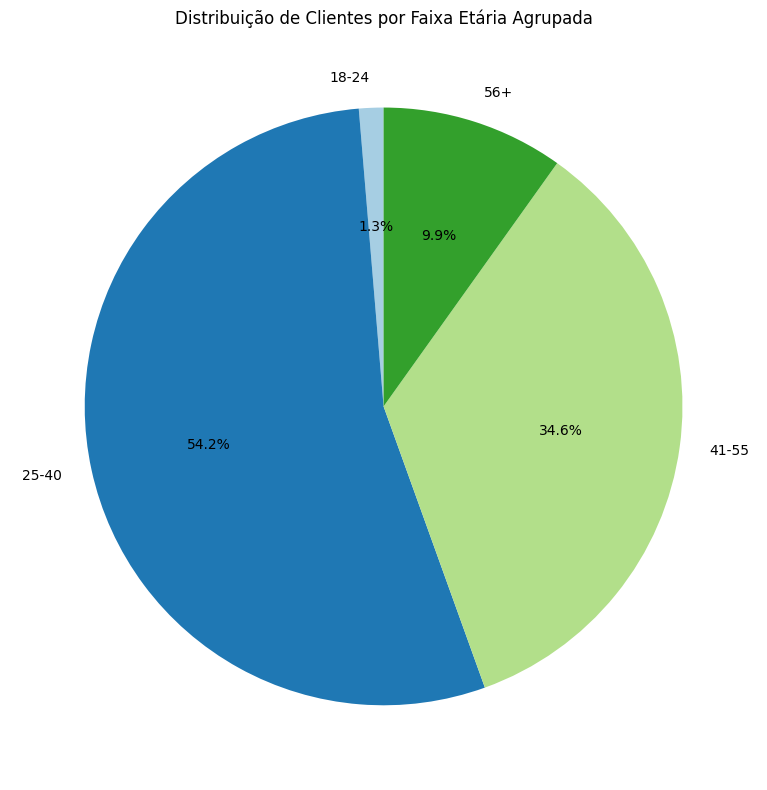

In [1714]:
import matplotlib.pyplot as plt

# Dados para o gráfico de pizza
faixas_etarias = ['18-24', '25-40', '41-55', '56+']
contagem_faixas = [
    1 + 64,              # Abaixo de 18 e 18-24
    1582 + 1076,        # 25-40
    650 + 559 + 490,    # 41-55
    383 + 28 + 73       # 56+
] 

# Criar gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(contagem_faixas, labels=faixas_etarias, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Adicionar título
plt.title('Distribuição de Clientes por Faixa Etária Agrupada')

# Exibir gráfico
plt.tight_layout()
plt.show()




**Insight**: Os gráficos reforçam visualmente o quanto o banco é popular entre os clientes da faixa etária de 25-40 anos. Mesmo entre os clientes que não compram títulos, a maior parte está concentrada nessa faixa etária. Essa informação sugere que o banco já possui uma forte presença nesse segmento, mas também indica uma oportunidade para desenvolver estratégias que incentivem esses clientes a realizarem compras.

Portanto, uma abordagem proativa para engajar esses clientes, como campanhas de marketing direcionadas ou ofertas personalizadas, pode resultar em um aumento significativo nas vendas de títulos de investimento.

### Conclusão Idade
- A análise revelou que a faixa etária do público-alvo do banco está predominantemente entre 25 e 40 anos. Isso é um indicativo claro de que as estratégias de marketing e comunicação da instituição estão bem alinhadas com os interesses dessa faixa etária.

- Além disso, a análise também mostrou que, enquanto os clientes que compram títulos estão concentrados nessa mesma faixa etária, os clientes que não realizam compras também se encontram predominantemente entre 25 e 40 anos. Essa sobreposição sugere que, apesar do potencial de compra, há uma resistência ou falta de interesse que merece ser investigada.

- Embora o número de compras diminua com o aumento da idade, existe uma oportunidade significativa para explorar estratégias voltadas para faixas etárias mais velhas. Esses grupos podem estar abertos a ofertas específicas que abordem suas necessidades e preocupações financeiras.

- Portanto, é fundamental investigar os motivos pelos quais os clientes da faixa etária alvo não estão comprando títulos. Compreender esses fatores pode ajudar a desenvolver abordagens personalizadas que incentivem a aquisição de produtos financeiros e, consequentemente, aumentem a satisfação do cliente e a rentabilidade do banco.

### 3- Análise de Compras com Base se o Cliente Possui ou Não Hipoteca

Nesta seção, vamos investigar como a presença ou ausência de uma hipoteca influencia a decisão de compra de títulos de investimento pelos clientes. A análise considerará as diferenças de comportamento entre aqueles que possuem uma hipoteca e aqueles que não possuem, buscando identificar padrões e tendências que possam informar estratégias de marketing mais eficazes.

Entender essa dinâmica é crucial para segmentar o público e desenvolver ofertas direcionadas, maximizando as oportunidades de vendas. Além disso, essa análise pode revelar se a hipoteca é um fator limitante para a aquisição de produtos financeiros, permitindo ao banco criar campanhas que abordem as preocupações e necessidades específicas de cada grupo.

In [1715]:

# Criar a tabela de contingência
tabela_contingencia = pd.crosstab(index=base['Tem_Hipoteca?'], columns=base['Cliente_Comprou_o_Titulo?'], 
                                   rownames=['Possui Hipoteca'], colnames=['Comprou Título'])

# Adicionar total de cada linha e coluna
tabela_contingencia.loc['Total'] = tabela_contingencia.sum()
tabela_contingencia['Total'] = tabela_contingencia.sum(axis=1)

# Exibir a tabela
tabela_contingencia


Comprou Título,0,1,Total
Possui Hipoteca,,,
0,2144,3116,5260
1,2762,1662,4424
Total,4906,4778,9684


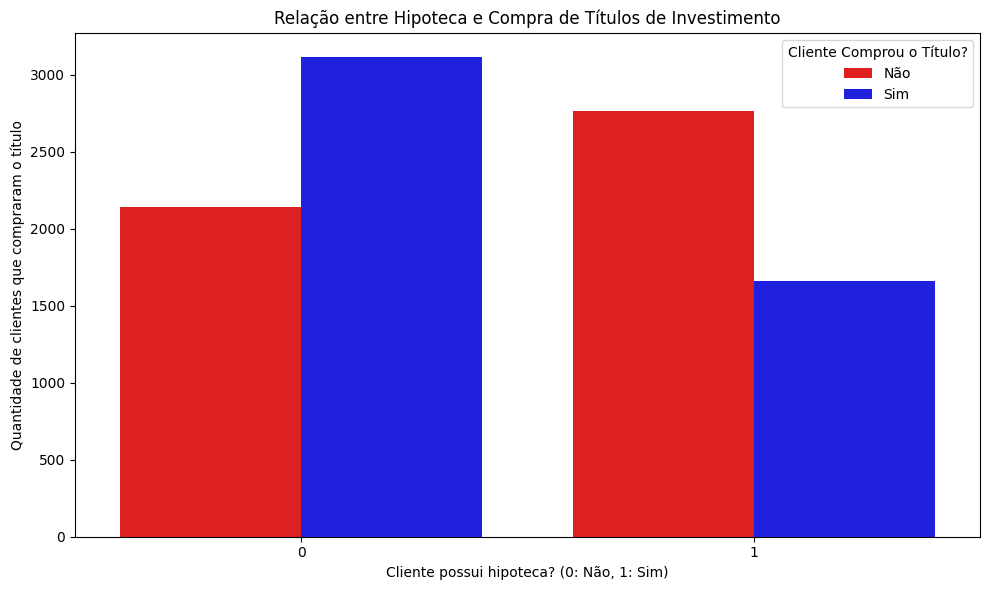

In [1716]:
# Criação do gráfico de barras
plt.figure(figsize=(10, 6))

# Atualizando a paleta conforme os valores únicos encontrados
palette = {1: "blue", 0: "red"}  # 1 corresponde a "Sim" e 0 a "Não" na nossa legenda
sns.countplot(data=base, x="Tem_Hipoteca?", hue="Cliente_Comprou_o_Titulo?", palette=palette)

# Título e rótulos
plt.title("Relação entre Hipoteca e Compra de Títulos de Investimento")
plt.xlabel("Cliente possui hipoteca? (0: Não, 1: Sim)")
plt.ylabel("Quantidade de clientes que compraram o título")
plt.legend(title='Cliente Comprou o Título?', loc='upper right', labels=["Não", "Sim"])
plt.tight_layout()

# Exibir gráfico
plt.show()




**Insight**: Observa-se que clientes sem hipoteca apresentam uma probabilidade significativamente maior de realizar compras, tanto em termos absolutos quanto em porcentagem em relação àqueles que possuem hipoteca. Portanto, é recomendável direcionar campanhas de marketing especificamente para esse segmento de clientes sem hipoteca, a fim de maximizar as oportunidades de vendas e engajamento.

### Conclusão Hipoteca

- A maior parte dos clientes (3116) que compram títulos não possui hipoteca, sugerindo que a ausência de hipoteca pode estar relacionada a um maior interesse em adquirir produtos financeiros, como títulos de investimento. Isso pode indicar que clientes sem dívidas maiores estão mais dispostos a investir.
Maior Número de Clientes sem Compra de Títulos:

- Observa-se que 2144 clientes sem hipoteca não compraram títulos, o que representa um número considerável. Essa informação pode sugerir que, mesmo entre os clientes sem dívidas, ainda há uma barreira ou falta de interesse na compra de títulos. Isso pode indicar a necessidade de ações de marketing e educação financeira focadas nesse público.
Clientes com Hipoteca Mostram Interesse em Comprar Títulos:

- Apesar de terem hipoteca, 1662 clientes ainda compraram títulos. Isso pode sugerir que esses clientes estão buscando diversificação de seus investimentos, mesmo enquanto gerenciam uma dívida. Esta situação apresenta uma oportunidade para o banco desenvolver produtos financeiros que atendam especificamente às necessidades de clientes que possuem hipoteca.
Diferenciação de Comportamento entre Grupos:

- A análise mostra que o comportamento de compra é diferente entre clientes que possuem hipoteca e aqueles que não possuem. É possível que fatores como segurança financeira, percepção de risco e conhecimento sobre investimentos influenciem essa decisão. O banco pode investigar quais características estão mais presentes entre os compradores de títulos, especialmente no grupo com hipoteca.
Oportunidade de Marketing e Educação:

- Com 4906 clientes não comprando títulos (total de 5260 sem hipoteca e 4424 com hipoteca), há uma grande oportunidade para o banco investir em estratégias de marketing e educação financeira. Programas que expliquem os benefícios dos títulos de investimento e ofereçam consultoria personalizada podem ser eficazes para converter esses clientes.
Necessidade de Segmentação Estratégica:

- As diferenças nas taxas de compra entre os dois grupos indicam a importância de uma segmentação mais refinada nas estratégias de marketing. Campanhas direcionadas que considerem a situação financeira e o perfil de risco de cada cliente podem ajudar a aumentar a taxa de conversão de clientes que não compram títulos.

### 4. Análise de Compras com Base na Situação de Devedor

Nesta seção, vamos analisar as compras realizadas pelos clientes em relação à sua situação de dívida. Essa análise é fundamental para entender como a condição de devedor pode influenciar o comportamento de compra.

Para isso, vamos começar checando quantas pessoas são devedoras e clientes do banco.


In [1717]:
base['Cliente_Devedor?'].value_counts()

Cliente_Devedor?
0    9619
1      65
Name: count, dtype: int64

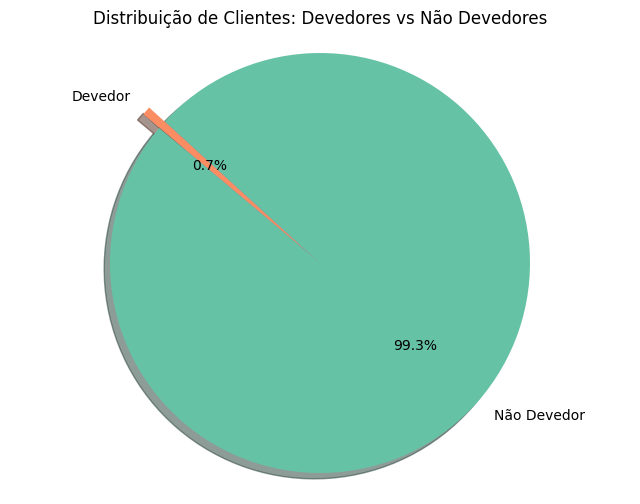

In [1718]:

# Dados
labels = ['Não Devedor', 'Devedor']
sizes = [9619, 65]
colors = ['#66c2a5', '#fc8d62']  # Cores para as fatias do gráfico
explode = (0.1, 0)  # Destaque a fatia de 'Não Devedor'

# Criando o gráfico de pizza
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)

# Adicionando título
plt.title('Distribuição de Clientes: Devedores vs Não Devedores')

# Exibindo o gráfico
plt.axis('equal')  # Igualando o aspecto do gráfico
plt.show()


### Conclusão Situação Devedor:

**Insight**: A análise dos clientes em relação à compra de títulos revela que a grande maioria, independentemente de terem realizado a compra ou não, apresenta um perfil de não devedor (código "0"). Isso sugere que a maior parte da base de clientes do banco está em uma situação financeira saudável, o que é um indicativo positivo para a instituição.

**Insight**: Nota-se que os clientes do banco têm um perfil predominantemente não devedor, com 9.619 clientes não devedores (99,35%) em comparação com apenas 65 clientes devedores (0,65%). Essa disparidade indica que a maioria dos clientes se encontra em uma situação financeira saudável, o que é um bom sinal para a instituição financeira.

### 5. Análise de Compras com Base na Quantidade de Ligações

Nesta seção, iremos analisar como a quantidade de ligações realizadas aos clientes influencia a decisão de compra. A quantidade de interações entre a empresa e seus clientes pode desempenhar um papel fundamental no processo de conversão, criando oportunidades para aumentar a conscientização sobre os produtos, responder a dúvidas e reforçar o relacionamento com o cliente.

A análise será focada em identificar se há uma correlação entre o número de ligações e a probabilidade de compra. Também avaliaremos se um aumento no número de contatos contribui para a tomada de decisão dos clientes e em que momento esse impacto se torna mais significativo. Essa investigação pode ajudar a otimizar os esforços de comunicação e ajustar as estratégias de abordagem, maximizando os resultados das campanhas de vendas.


In [1719]:
cliente_comprou['Qte_de_Ligações_Feitas'].value_counts()

Qte_de_Ligações_Feitas
1     2333
2     1272
3      555
4      284
5      124
6       80
7       33
8       28
9       17
11      14
10      13
17       6
15       4
13       4
14       4
16       2
29       1
32       1
12       1
24       1
21       1
Name: count, dtype: int64

**Insight**: Nota-se que a quantidade de ligações necessárias para efetivar uma venda diminui conforme o número de tentativas aumenta. A maior concentração de vendas ocorre após 1 ou 2 ligações, representando um comportamento típico onde a maioria das conversões acontece com poucos contatos.

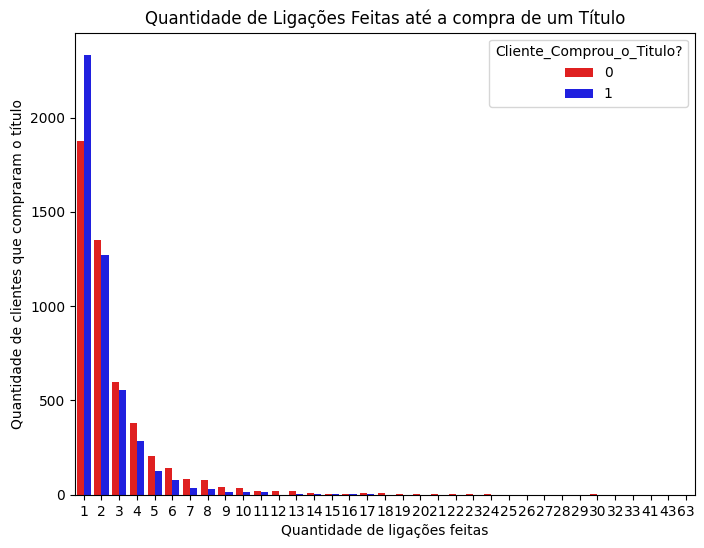

In [1720]:
# Gráfico 3: Quantidade de ligações feitas por cliente que comprou ou não o título
plt.figure(figsize=(8, 6))
sns.countplot(x="Qte_de_Ligações_Feitas", hue="Cliente_Comprou_o_Titulo?", data=base, palette={1: "blue", 0: "red"})
plt.title('Quantidade de Ligações Feitas até a compra de um Título')
plt.xlabel("Quantidade de ligações feitas")
plt.ylabel("Quantidade de clientes que compraram o título")
plt.show()


**Insight**: Nota-se que, a partir da sexta ligação, o número de conversões diminui consideravelmente. Isso indica um desperdício de recursos, já que os profissionais envolvidos nas ligações estão investindo tempo em clientes que apresentam baixa probabilidade de conversão. Assim, recomenda-se estabelecer um limite de cerca de seis ligações por cliente, permitindo um direcionamento mais eficaz da equipe de vendas e priorizando o contato com clientes que estão mais propensos a realizar a compra nas primeiras interações.


### Conclusão Quantidade de Ligações
- Com base nos insights obtidos, podemos concluir que a eficiência nas conversões de vendas está diretamente relacionada ao número de ligações realizadas. Observa-se que a maioria das vendas é concretizada após apenas uma ou duas ligações, sugerindo que os clientes mais propensos a comprar geralmente fazem isso nas primeiras interações. Além disso, a análise revela que, após a sexta ligação, as chances de conversão diminuem significativamente, o que indica um ponto de corte natural para a equipe de vendas.

- Portanto, é recomendável que os esforços de vendas sejam concentrados em clientes que apresentam maior probabilidade de conversão nas primeiras tentativas. Estabelecer um limite de até seis ligações pode otimizar o uso de recursos, permitindo que a equipe se concentre em prospects com maior potencial de compra, reduzindo desperdícios e aumentando a eficiência do processo de vendas.

### 6- Análise de Compras Baseada nas Variáveis Categóricas

Nesta seção, vamos explorar as variáveis categóricas, que desempenham um papel fundamental na análise do comportamento de compra dos clientes. Após termos analisado as variáveis numéricas, agora focaremos em variáveis como Formação Acadêmica, Estado Civil e Profissão, que podem fornecer informações importantes sobre perfis de clientes mais propensos a realizar compras.

Com isso, vamos começar explorando a variável categórica Formação, que se refere ao nível de educação dos clientes do banco. Essa análise é crucial para entender se o grau de instrução dos clientes influencia suas decisões de compra e como podemos identificar padrões que ajudem a segmentar e direcionar as ações de marketing de forma mais eficaz.

In [1721]:
# Agrupar os dados por formação e se o cliente comprou o título
agrupamento_formacao = base.groupby(['Formação', 'Cliente_Comprou_o_Titulo?']).size().unstack(fill_value=0)

# Adicionar uma coluna de total de compras
agrupamento_formacao['Total'] = agrupamento_formacao.sum(axis=1)

# Adicionar uma coluna para a porcentagem de compra
agrupamento_formacao['Porcentagem de Compra (%)'] = (agrupamento_formacao[1] / agrupamento_formacao['Total']) * 100

# Exibir o resultado
agrupamento_formacao


Cliente_Comprou_o_Titulo?,0,1,Total,Porcentagem de Compra (%)
Formação,,,,
Desconhecido,209,243,452,53.761062
Ensino Médio,2531,2187,4718,46.354387
Ensino Superior,1430,1817,3247,55.959347
Fundamental,736,531,1267,41.910024


**Insight**: A análise mostra que a formação acadêmica dos clientes tem um impacto significativo na probabilidade de compra de títulos. Clientes com Ensino Superior apresentam a maior porcentagem de compra, sugerindo que a educação superior pode estar associada a uma maior disposição ou capacidade financeira para adquirir títulos.

Vamos explorar graficamente esse ponto, utilizando um gráfico de barras para visualizar a porcentagem de compra de títulos conforme a formação dos clientes.

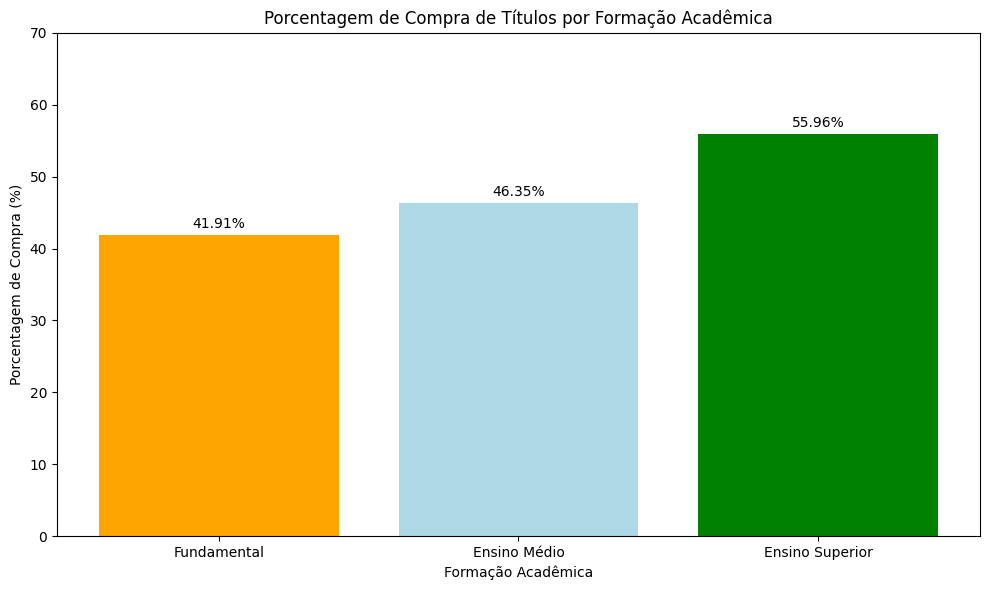

In [1722]:
# Foi tirado os desconhecidos, pois não ajuda em nada na nossa análise.
# Dados
dados = {
    'Formação': ['Fundamental','Ensino Médio', 'Ensino Superior'],
    'Porcentagem de Compra (%)': [41.91, 46.35, 55.96,]
}

# Criar DataFrame
df = pd.DataFrame(dados)

# Criar gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df['Formação'], df['Porcentagem de Compra (%)'], color=['orange', 'lightblue', 'green', 'red'])

# Adicionar título e rótulos
plt.title('Porcentagem de Compra de Títulos por Formação Acadêmica')
plt.xlabel('Formação Acadêmica')
plt.ylabel('Porcentagem de Compra (%)')

# Exibir valores nas barras
for i in range(len(df)):
    plt.text(i, df['Porcentagem de Compra (%)'][i] + 1, f"{df['Porcentagem de Compra (%)'][i]:.2f}%", ha='center')

# Ajustar layout e exibir gráfico
plt.ylim(0, 70)  # Ajusta o limite do eixo y para melhor visualização
plt.tight_layout()
plt.show()


**Insight**: O gráfico de barras reforça graficamente o ponto dito acima, por isso é importante que para os clientes com Ensino Médio e Fundamental, pode ser valioso implementar programas de educação financeira que expliquem os benefícios da aquisição de títulos. Isso pode aumentar a taxa de conversão e encorajar mais pessoas a investirem.

Após essa breve, mas enriquecedora análise sobre a Formação Acadêmica, vamos agora explorar a variável Estado Civil. Nossa intenção é compreender como o estado civil dos clientes pode influenciar sua probabilidade de compra do Título bancário, ajudando a identificar possíveis tendências de comportamento de compra com base nessa característica.

In [1723]:
porcentagem = base.groupby('Estado_Civil')['Cliente_Comprou_o_Titulo?'].agg(['count', 'sum'])

print(porcentagem)

              count   sum
Estado_Civil             
Casado         5469  2491
Divorciado     1056   528
Solteiro       3159  1759


**Insight**: Observa-se uma ligeira maioria de clientes casados no banco Europeu. No entanto, a taxa de conversão entre esses clientes não é a mais alta em comparação com outros grupos. Isso sugere uma oportunidade para o banco investigar as razões por trás desse comportamento e buscar estratégias para melhorar a taxa de conversão entre clientes casados, seja através de campanhas mais direcionadas ou abordagens de marketing mais eficazes.

Para tornar a análise mais completa e visualmente clara, será produzido um gráfico que ilustrará a distribuição dos clientes com base em seu estado civil, destacando a taxa de conversão para a compra do título bancário em cada grupo. Esse gráfico facilitará a visualização das tendências de compra e ajudará a identificar os grupos de clientes com maior e menor propensão a realizar a compra, permitindo uma análise mais objetiva.

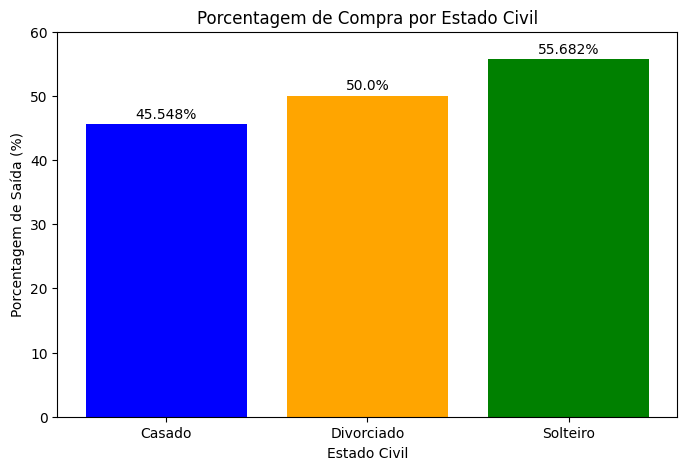

In [1724]:
# Dados da tabela
dados = {
    'Estado_Civil': ['Casado', 'Divorciado', 'Solteiro'],
    'Porcentagem de Saída': [45.548, 50.000, 55.682]
}

# Criando o gráfico
plt.figure(figsize=(8, 5))
plt.bar(dados['Estado_Civil'], dados['Porcentagem de Saída'], color=['blue', 'orange', 'green'])

# Adicionando título e rótulos
plt.title('Porcentagem de Compra por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Porcentagem de Saída (%)')

# Adicionando a porcentagem acima das barras
for i, v in enumerate(dados['Porcentagem de Saída']):
    plt.text(i, v + 1, f"{v}%", ha='center', fontsize=10)

# Exibindo o gráfico
plt.ylim(0, 60)  # Ajusta o limite do eixo y para melhor visualização
plt.show()


**Insight**:  A maior parte dos clientes é casada, com um total de 5.469 clientes nessa categoria. No entanto, a taxa de compra entre eles é de 45,55%, o que é inferior à taxa de compra dos solteiros.

**Insight**:  Apesar da grande quantidade de clientes casados, a taxa de compra abaixo de 50% sugere que este grupo pode não estar tão engajado ou convencido a adquirir títulos. Isso pode indicar uma oportunidade de marketing ou estratégias de venda específicas para aumentar a taxa de conversão nesse segmento.

**Insight**: Solteiros com Alta Taxa de Compra: Por outro lado, os solteiros apresentam uma taxa de compra de 55,68%, superior à dos casados e dos divorciados (50,00%). Isso sugere que os solteiros podem estar mais inclinados a investir em títulos, representando um público potencial a ser explorado mais profundamente pela empresa.

Para concluir a análise exploratória e avançar para o relatório final, vamos agora explorar como a Profissão dos clientes influencia seus padrões de compra. Essa análise nos permitirá identificar quais grupos profissionais têm maior tendência a adquirir os títulos bancários, possibilitando um entendimento mais profundo sobre como o perfil ocupacional impacta o comportamento de compra e abrindo caminhos para estratégias de vendas mais personalizadas.

In [1725]:
agrupamento_profissao = base.groupby(['Profissão', 'Cliente_Comprou_o_Titulo?']).size().unstack(fill_value=0)

# Adicionando uma coluna de Total
agrupamento_profissao['Total'] = agrupamento_profissao.sum(axis=1)

# Calculando a porcentagem de compra
agrupamento_profissao['Porcentagem de Compra (%)'] = (agrupamento_profissao[1] / agrupamento_profissao['Total']) * 100

# Exibindo o resultado
agrupamento_profissao

Cliente_Comprou_o_Titulo?,0,1,Total,Porcentagem de Compra (%)
Profissão,,,,
Administrador,1629,1773,3402,52.116402
Aposentado,227,479,706,67.847025
Autônomo,187,168,355,47.323944
Desconhecido,33,30,63,47.619048
Desempregado,130,187,317,58.990536
Diarista,141,99,240,41.250000
Empresário,175,98,273,35.897436
Estudante,86,258,344,75.000000
Operário,1003,618,1621,38.124614


Aqui, apresentamos uma visão geral de como diferentes Profissões estão relacionadas à compra ou não dos títulos bancários. Para simplificar e tornar a análise mais assertiva, agrupamos empresários e administradores na mesma categoria, visto que ambos compartilham características semelhantes no comportamento de compra.

**Insight**: Observa-se que a maioria dos clientes do banco são administradores, o que representa uma oportunidade significativa para aumentar a conversão desse grupo. Ao entender melhor as necessidades e preferências dos administradores, o banco pode desenvolver estratégias de marketing e abordagens personalizadas que atendam a esse perfil, potencializando as vendas dos títulos.

Para uma análise mais detalhada e visual desse tópico, vamos explorar graficamente o perfil dos clientes que mais adquirem os títulos, identificando quais categorias profissionais possuem maior propensão a realizar a compra. Isso nos permitirá traçar estratégias mais eficazes e segmentadas.

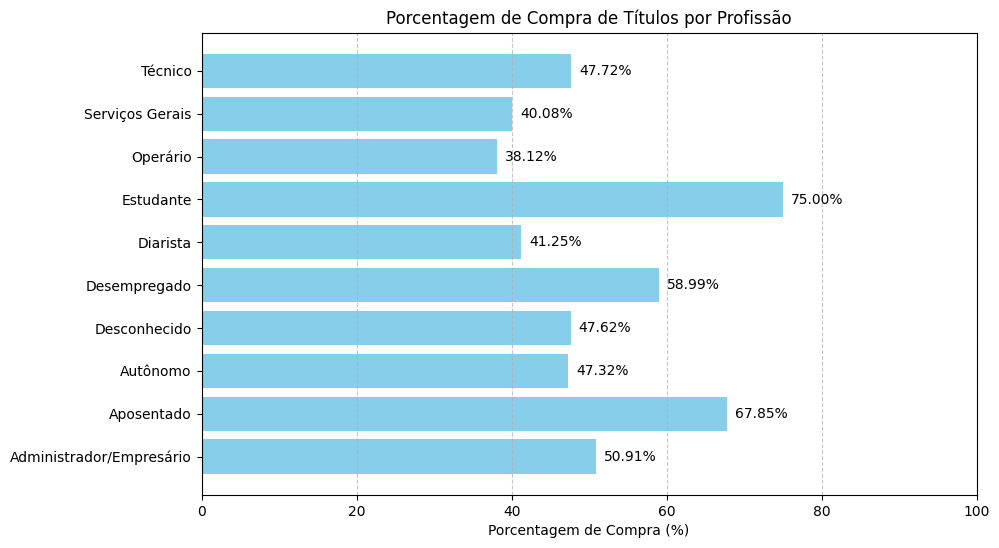

In [1726]:
# Dados fornecidos
data = {
    'Profissão': [
        'Administrador/Empresário', 'Aposentado', 'Autônomo', 
        'Desconhecido', 'Desempregado', 'Diarista', 
        'Estudante', 'Operário', 'Serviços Gerais', 'Técnico'
    ],
    'Cliente_Comprou_o_Titulo? (0)': [
        1804, 227, 187, 
        33, 130, 141, 
        86, 1003, 468, 827
    ],
    'Cliente_Comprou_o_Titulo? (1)': [
        1871, 479, 168, 
        30, 187, 99, 
        258, 618, 313, 755
    ],
    'Total': [
        3675, 706, 355, 
        63, 317, 240, 
        344, 1621, 781, 1582
    ],
    'Porcentagem de Compra (%)': [
        50.911500, 67.847025, 47.323944, 
        47.619048, 58.990536, 41.250000, 
        75.000000, 38.124614, 40.076825, 47.724399
    ]
}

# Criar DataFrame
df = pd.DataFrame(data)

# Plotar gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(df['Profissão'], df['Porcentagem de Compra (%)'], color='skyblue')
plt.xlabel('Porcentagem de Compra (%)')
plt.title('Porcentagem de Compra de Títulos por Profissão')
plt.xlim(0, 100)  # Limitar o eixo X de 0 a 100
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Exibir os valores em cada barra
for index, value in enumerate(df['Porcentagem de Compra (%)']):
    plt.text(value + 1, index, f'{value:.2f}%', va='center')

plt.show()



**Insight**: A análise dos dados revela que o grupo com maior porcentagem de compras de títulos é composto por estudantes, com 75% de taxa de conversão. Esse resultado pode estar relacionado ao fato de que estudantes, geralmente, têm um perfil mais receptivo a produtos financeiros que visam o planejamento futuro. Muitos estudantes podem ver nos títulos uma oportunidade de investir em educação ou acumular recursos para o início de suas carreiras profissionais, onde a segurança financeira se torna uma prioridade.

**Insight**: Por outro lado, os operários apresentam a menor taxa de conversão, com apenas 38% de compras. Isso pode estar relacionado a diversos fatores, como renda disponível menor, maior aversão ao risco ou uma menor familiaridade com produtos financeiros complexos. Esse grupo pode dar preferência a produtos financeiros de curto prazo ou mais tangíveis, devido à necessidade de liquidez imediata. Esse padrão reforça a hipótese levantada anteriormente, onde clientes com maior escolaridade ou em fases de transição de carreira, como os estudantes, têm maior propensão a realizar investimentos de longo prazo. Por outro lado, profissões que tipicamente possuem salários mais baixos ou menos estabilidade financeira podem demonstrar uma tendência mais conservadora, o que diminui o interesse por títulos.

**Insight**: Ao analisar as profissões de operários e técnicos, notamos que essas categorias juntas representam um número significativo de clientes no banco. Contudo, suas taxas de conversão não são favoráveis. Os operários, com uma taxa de conversão de apenas 38,12%, totalizam cerca de 1.621 clientes, enquanto os técnicos, com uma taxa de 47,72%, correspondem a aproximadamente 1.582 clientes. Essa combinação resulta em um total de 3.203 clientes que apresentam uma conversão abaixo da média. Esses dados sugerem que esses grupos podem estar enfrentando barreiras específicas ao investimento em títulos bancários, como uma renda disponível limitada ou maior aversão ao risco. Assim, o banco pode identificar uma oportunidade significativa de aprimorar sua abordagem, focando em produtos e estratégias que atendam melhor às necessidades financeiras e comportamentais desses clientes, potencialmente melhorando a conversão e o engajamento.

**Insight**: O grupo de aposentados possui uma alta taxa de conversão (67,85%), o que sugere que eles veem os títulos como uma forma de garantir segurança e estabilidade financeira a longo prazo. Esse comportamento pode estar ligado a uma busca por estabilidade em uma fase em que a renda geralmente é fixa e as despesas com saúde e qualidade de vida se tornam prioritárias.



### Conclusão Variáveis Categóricas

- Influência da Escolaridade: A análise destaca que o nível educacional tem um impacto direto na propensão à compra de títulos. Clientes com Ensino Superior têm taxas de conversão mais altas, sugerindo que a familiaridade com produtos financeiros e o conhecimento sobre investimentos são fatores que influenciam positivamente. Para clientes com menor escolaridade, programas de educação financeira podem ser um caminho eficaz para elevar o interesse em títulos.

- Estudantes com Alta Conversão: O grupo de estudantes possui a maior taxa de conversão (75%), possivelmente pela busca de segurança financeira para o futuro. Isso sugere que campanhas focadas em planejamento financeiro e objetivos de longo prazo podem ressoar bem com este público, que está em fase de transição para a vida profissional e financeira.

- Perfil Socioeconômico e Conversão: Grupos de menor renda disponível, como operários (38%) e técnicos (47,72%), apresentam conversão abaixo da média. Esses dados apontam que esses clientes podem enfrentar barreiras financeiras para investir em títulos de longo prazo. Oferecer produtos financeiros com maior liquidez e menor risco pode ajudar a tornar o investimento mais acessível para esses perfis.

- Aposentados e Segurança Financeira: A alta taxa de conversão entre aposentados (67,85%) reflete a busca desse grupo por estabilidade e preservação do patrimônio, características que os títulos bancários podem proporcionar. Focar em produtos de baixo risco e retorno seguro pode ser uma estratégia eficaz para continuar atraindo aposentados.

- Estado Civil e Propensão a Investir: Clientes solteiros possuem uma taxa de conversão superior (55,68%) à de clientes casados (45,55%). Isso indica que solteiros podem estar mais inclinados a comprometer uma parte de sua renda em investimentos. Já para os casados, estratégias de marketing que explorem a importância da segurança financeira familiar podem ajudar a elevar a taxa de conversão desse grupo.

- Potencial no Grupo de Administradores: Como o grupo de administradores representa uma porção significativa da base de clientes, há uma oportunidade relevante de personalizar produtos e estratégias de marketing para aumentar a conversão. Entender melhor as necessidades e o comportamento financeiro desse grupo pode trazer benefícios expressivos para o banco.

- Oportunidade de Educação Financeira: De maneira geral, o banco pode se beneficiar ao oferecer educação financeira segmentada, especialmente para os perfis com menor taxa de conversão. Isso pode incluir desde palestras até materiais explicativos, visando aumentar a compreensão sobre os benefícios de investimentos de longo prazo, como os títulos, e fomentar o interesse de clientes em diferentes faixas educacionais e profissionais.


### Relatório Final

Com base em uma análise detalhada do perfil dos clientes do Banco Europeu, este relatório final apresenta insights estratégicos para direcionar futuras campanhas e otimizar os resultados do banco. Foram avaliadas variáveis-chave como idade, profissão, estado civil, nível de escolaridade, situação de crédito, hipoteca e empréstimo. O objetivo é identificar grupos de clientes mais propensos a adquirir produtos de investimento e fornecer recomendações para futuras ações de marketing e retenção.

Antes de prosseguir, gostaria de desenvolver duas personas: uma representando o perfil do cliente comprador e a outra o perfil do cliente que não realiza compras. Essas personas serão essenciais para direcionar nossas campanhas de marketing de forma mais eficaz.

## Personas 

**Persona 1: Perfil Comprador**

- Nome: Ana Carvalho
- Idade: 35 anos
- Estado Civil: Solteira
- Formação: Formada em Administração e estudante de Economia.
- Profissão: Administradora em uma empresa de médio porte e gosta muito de estudar sobre ações.
- Situação Financeira: Sem hipoteca, com uma renda disponível considerável.

**Comportamento de Compra**:

- Motivações: Busca por segurança financeira e preservação do patrimônio. Interessa-se por produtos de investimento que ofereçam retorno seguro.
- Histórico de Compra: Comprou títulos bancários devido à percepção de que esses produtos podem ajudar a diversificar seus investimentos e garantir um futuro financeiro estável.
- Interesses: Participa de workshops de educação financeira, está sempre em busca de aprender mais sobre investimentos e finanças pessoais.

**Persona 2: Perfil Não Comprador**
- Nome: Carlos Silva
- Idade: 28 anos
- Estado Civil: Casado
- Formação: Somente Ensino Fundamental
- Profissão: Operário em uma Fábrica de Tecidos
- Situação Financeira: Sem hipoteca, porém com uma renda variável e menor estabilidade financeira

**Comportamento de Compra:**

- Motivações: Embora tenha interesse em investimentos, Carlos tem uma aversão ao risco e prefere manter sua liquidez para emergências. Ele não vê os títulos bancários como uma prioridade no momento.
- Histórico de Compra: Não comprou títulos até agora, mesmo tendo potencial, devido à falta de informações claras sobre os benefícios e a sensação de insegurança em comprometer seus recursos.
- Interesses: Está em busca de uma maior compreensão sobre finanças pessoais, mas ainda não se sente confiante em investir em produtos financeiros.

A análise das personas é importante, pois ajuda a equipe de marketing a entender melhor o perfil de seus clientes e as suas necessidades. Ao identificar diferentes grupos, a equipe pode criar estratégias mais eficazes e personalizadas para aumentar a taxa de conversão de produtos financeiros, como os títulos bancários.

A compreensão das personas permite à equipe de marketing não apenas direcionar melhor suas campanhas, mas também contribuir para o aumento da satisfação e da confiança dos clientes nos produtos oferecidos. Investir na análise de personas é, portanto, um passo fundamental para o sucesso das estratégias de marketing do banco.



## Faixa Etária
### Insight: Predominância de Clientes na Faixa Etária de 25 a 40 Anos

**Proposta Recomendada**: Alinhar as estratégias de marketing e comunicação para melhor atender os interesses dessa faixa etária.


**Ação**: Conduzir uma pesquisa de mercado detalhada, utilizando questionários e entrevistas, para identificar os interesses e comportamentos financeiros dos clientes na faixa etária de 25 a 40 anos. Esta pesquisa deve incluir perguntas sobre preferências de produtos, canais de comunicação preferidos e preocupações financeiras.


**Estratégia**: Campanhas Direcionadas: Desenvolver campanhas de marketing que abordem diretamente os interesses e preocupações dessa faixa etária, promovendo produtos financeiros e serviços que se alinhem com suas necessidades. Isso pode incluir a criação de conteúdo relevante em redes sociais e e-mails segmentados que destaquem ofertas especiais e informações sobre investimentos.

### Insight: Sobreposição entre Compradores e Não Compradores de Títulos

**Proposta Recomendada**: Investigar as barreiras à compra de títulos entre clientes na faixa etária de 25 a 40 anos.

**Ação**: Conduzir grupos focais e entrevistas com clientes dessa faixa etária para descobrir os motivos pelos quais eles não estão adquirindo títulos, apesar de apresentarem potencial de compra. Analisar se a falta de conhecimento, inseguranças financeiras ou percepções negativas sobre os produtos são fatores que contribuem para essa resistência.



**Estratégia**: Educação e Conscientização: Criar programas de educação financeira que abordem as dúvidas e inseguranças dos clientes sobre a compra de títulos, incluindo webinars, workshops e materiais educativos que expliquem os benefícios e riscos associados a esses produtos, ajudando a superar a resistência.




### Insight: Oportunidade com Faixas Etárias Mais Velhas

**Proposta Recomendada**: Explorar estratégias específicas para engajar clientes mais velhos em ofertas financeiras.

**Ação**: Realizar uma pesquisa detalhada para identificar as necessidades financeiras e preocupações de clientes em faixas etárias superiores a 40 anos. Utilizar métodos qualitativos, como entrevistas e questionários, para captar informações sobre os interesses desses clientes em relação a produtos financeiros.


**Estratégia**: Ofertas Personalizadas: Desenvolver produtos financeiros que atendam especificamente às necessidades e preocupações dos clientes mais velhos, como planejamento de aposentadoria e investimentos de baixo risco. Implementar campanhas de marketing que se concentrem nas vantagens desses produtos, destacando segurança e crescimento patrimonial.

## Situação Hipoteca
### Insight: Predominância de Clientes Sem Hipoteca que Compram Títulos

**Proposta Recomendada**: Investigar como a ausência de hipoteca impacta a disposição para comprar produtos financeiros.

**Ação**: Analisar o perfil dos clientes sem hipoteca que compram títulos, utilizando dados de compras e informações demográficas. Realizar entrevistas ou enviar pesquisas para entender suas motivações, como segurança financeira e desejo de diversificação de investimentos.



**Estratégia**: Promoções Específicas: Criar ofertas direcionadas para clientes sem hipoteca, enfatizando os benefícios de investimentos em títulos como uma maneira de aumentar seu patrimônio. Desenvolver campanhas que destaquem histórias de sucesso de outros clientes nessa situação.

### Insight: Barreiras à Compra de Títulos Entre Clientes Sem Hipoteca

**Proposta Recomendada**: Implementar ações de marketing voltadas para a conversão de clientes sem hipoteca que não compraram títulos.

**Ação**: Realizar uma análise detalhada sobre as razões que levam 2144 clientes sem hipoteca a não comprar títulos. Utilizar métodos como entrevistas, questionários e análise de dados de feedback para identificar barreiras específicas, como falta de informações ou percepções errôneas sobre os títulos.



**Estratégia**: Educação Financeira: Desenvolver programas de conscientização que abordem a importância e os benefícios dos títulos, utilizando materiais explicativos, webinars e consultorias personalizadas para aumentar o interesse e a conversão. Criar uma série de conteúdo educacional que desmistifique o processo de investimento.

### Insight: Clientes com Hipoteca que Compram Títulos

**Proposta Recomendada**: Aproveitar o interesse dos clientes com hipoteca na compra de títulos para oferecer produtos que atendam suas necessidades.

**Ação**: Investigar as características e motivações de 1662 clientes com hipoteca que adquiriram títulos. Realizar entrevistas e coletar dados sobre suas decisões financeiras, focando em como eles gerenciam a dívida e suas expectativas em relação a investimentos.



**Estratégia**: Diversificação de Produtos: Criar produtos financeiros que atendam especificamente às necessidades de clientes com hipoteca, incentivando a diversificação de seus investimentos enquanto gerenciam suas dívidas. Desenvolver pacotes de produtos que combinem títulos e consultoria financeira, abordando as preocupações específicas desses clientes.



## **Situação Devedor**

### Insight: Predominância de Clientes Não Devedores

**Proposta Recomendada**: Aproveitar o perfil saudável da base de clientes para promover produtos financeiros.

**Ação**: Realizar uma análise mais aprofundada dos clientes não devedores para entender melhor suas necessidades e preferências em relação a produtos financeiros. Isso pode incluir entrevistas, pesquisas e análise de comportamento de compra.


**Estratégia**:Para Clientes Não Devedores: Criar campanhas de marketing que destaquem oportunidades de investimento, como a compra de títulos, ressaltando os benefícios e a segurança que eles oferecem. Incentivar a diversificação de investimentos para fortalecer ainda mais a situação financeira dos clientes.

### Insight: Baixa Proporção de Clientes Devedores

**Proposta Recomendada**: Explorar oportunidades de educação financeira para todos os clientes.

**Ação**: Desenvolver materiais educativos que expliquem os benefícios de manter uma situação financeira saudável e os riscos associados ao endividamento. Isso pode incluir webinars, e-books e consultas personalizadas.

**Estratégia**:Para Todos os Clientes: Implementar programas de educação financeira que abordem temas como gestão de dívidas, planejamento financeiro e investimentos. Isso pode aumentar a conscientização e o engajamento, promovendo um perfil financeiro saudável.
Insight: Oportunidade de Atração de Novos Clientes

**Proposta Recomendada**: Focar em estratégias de aquisição que atraiam clientes com perfil de não devedor.

**Ação**: Utilizar dados demográficos e comportamentais para identificar potenciais clientes que se enquadrem no perfil desejado.

**Estratégia**: Campanhas de Aquisição: Criar campanhas direcionadas para atrair novos clientes que apresentem características financeiras saudáveis, destacando a reputação do banco em ajudar clientes a prosperar financeiramente e a acessibilidade de seus produtos.